# Crime and Weather-ment

### Will certain weather conditions be statistically related to increases in crime in Louisville, Kentucky?
Reports of crime occuring from 2004 to 2020 are compared against precipitation and high and low temperatures for each day. The analyzed data spans 6210 days and covers 1,367,556 crimes occurring on those days.
    



#### Notes about crime files: 
* .csv files retrieved from https://data.louisvilleky.gov/
* 'Crime_Data_2003.csv' only has ~19,000 crimes reported when years 2004-2020 range from ~71,000 to ~91,000 crime reports/year. So, 2003 was left out of the anaylsis
* 'Crime_Data_2019.csv' has reports from 2019-2021. 2021 Crimes are left out of the anaylsis.
* Crime analysis is performed on the occurence date.


#### Notes about weather file:
* .csv retrieved from https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00154958/detail
* Weather statements (ex: precipitation amounts, min temp) cannot be linked to the exact time of the crime occurence with this data.
* Precipitation amounts are in inches
* 5/27/2008 and 5/28/2008 do not have a 'PRCP' (precipitation) amount listed and are blank. 5/28/2008 lists '.02' under MDPR (Multiday precipitation total). No other day has amounts listed under MDPR. '.01' is manually added to 5/27/2008 and 5/28/2008 for the purposes of this analysis.   


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

louisville_weather=pd.read_csv("data/2451549.csv") #Weather from 1-1-1997 til 2-9-2021

#2014 --> 2556

#2016 --> 6939
#2017 --> 7305
#2018--> 7670


df_index_start = 2556 

# crime_files = ['Crime_Data_2016_39.csv','Crime_Data_2017_9.csv','Crime_Data_2018.csv', 'Crime_Data_2019.csv']

crime_files = ['Crime_Data_2004.csv', 'Crime_Data_2005.csv', 'Crime_Data_2006.csv','Crime_Data_2007.csv','Crime_Data_2008.csv','Crime_Data_2009.csv','Crime_Data_2010.csv','Crime_Data_2011.csv','Crime_Data_2012.csv','Crime_Data_2013.csv','Crime_Data_2014.csv','Crime_Data_2015.csv','Crime_Data_2016_39.csv','Crime_Data_2017_9.csv', 'Crime_Data_2018.csv', 'Crime_Data_2019.csv']

list_of_crime_dfs = []

for file in crime_files:
    df = pd.read_csv("data/"+file, index_col=None, header=0)
    list_of_crime_dfs.append(df)

concat_crime_df = pd.concat(list_of_crime_dfs, axis=0, ignore_index=True)

# concat_crime_df = concat_crime_df.drop_duplicates(subset=['INCIDENT_NUMBER'])
print("The number of crimes listed: ", len(concat_crime_df), ". Number of unique incident numbers: ", len(concat_crime_df["INCIDENT_NUMBER"].unique()) )

total_counts = concat_crime_df['CRIME_TYPE'].value_counts()
total_counts





The number of crimes listed:  1367556 . Number of unique incident numbers:  1122112


THEFT/LARCENY               241147
DRUGS/ALCOHOL VIOLATIONS    220742
ASSAULT                     192046
OTHER                       190194
BURGLARY                    113940
VANDALISM                   111249
VEHICLE BREAK-IN/THEFT      106142
FRAUD                        62005
MOTOR VEHICLE THEFT          56440
ROBBERY                      26469
DISTURBING THE PEACE         16633
WEAPONS                      16098
SEX CRIMES                   11113
DUI                           1580
HOMICIDE                      1404
ARSON                          354
Name: CRIME_TYPE, dtype: int64

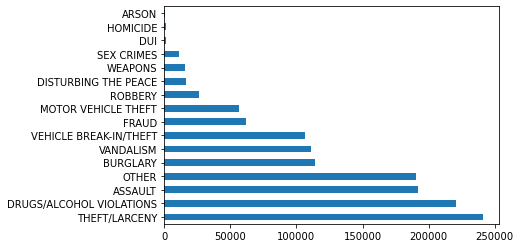

In [2]:
total_counts.plot.barh(x='Number of crimes' )

In [3]:
concat_crime_df.head()

INCIDENT_NUMBER        DATE_REPORTED         DATE_OCCURED  \
0    80-04-200985  2004-01-09 17:00:00  2004-01-09 15:50:00   
1    80-04-100882  2004-01-11 22:20:00  2004-01-11 02:00:00   
2    80-04-200999  2004-01-09 21:42:00  2004-01-09 19:14:00   
3    80-04-100812  2004-01-10 12:00:00  2004-01-10 08:30:00   
4    80-04-201008  2004-01-09 07:00:00  2004-01-09 05:00:00   

                                          UOR_DESC     CRIME_TYPE NIBRS_CODE  \
0  THEFT BY UNLAWFUL TAKING/DISP-SHOPLIFTING -MISD  THEFT/LARCENY        23C   
1                            BURGLARY - 1ST DEGREE       BURGLARY        220   
2                             ROBBERY - 1ST DEGREE        ROBBERY        120   
3         ASSAULT - 4TH DEGREE (NO VISIBLE INJURY)        ASSAULT        13B   
4  THEFT BY UNLAWFUL TAKING/DISP-SHOPLIFTING -MISD  THEFT/LARCENY        23C   

  UCR_HIERARCHY   ATT_COMP LMPD_DIVISION LMPD_BEAT           PREMISE_TYPE  \
0        PART I  COMPLETED  1ST DIVISION       112      CONVENIENCE STORE   
1        PART I  COMPLETED  3RD DIVISION       334       RESIDENCE / HOME   
2        PART I  COMPLETED  4TH DIVISION       435       RESIDENCE / HOME   
3       PART II  COMPLETED  6TH DIVISION       625       RESIDENCE / HOME   
4        PART I  COMPLETED  5TH DIVISION       513  GROCERY / SUPERMARKET   

                                       BLOCK_ADDRESS        CITY ZIP_CODE  \
0  2500 BLOCK W BROADWAY                         ...  LOUISVILLE    40211   
1  10500 BLOCK S DODGE LN                        ...  LOUISVILLE    40272   
2  4000 BLOCK LENTZ AVE                          ...  LOUISVILLE    40215   
3  1600 BLOCK HUNNINGTON PL                      ...  LOUISVILLE    40220   
4  2400 BLOCK BARDSTOWN RD                       ...  LOUISVILLE    40205   

       ID  
0  878862  
1  878863  
2  878864  
3  878865  
4  878866

In [4]:
#Strips the time from date/time
concat_crime_df['DATE_OCCURED_NOTIME'] = concat_crime_df['DATE_OCCURED'].str.split(' ').str[0]
# crime_2019['DATE_OCCURED_NOTIME']
concat_crime_df['Report-Occur-Difference']= pd.to_datetime(concat_crime_df['DATE_REPORTED'].str.split(' ').str[0]) - pd.to_datetime(concat_crime_df['DATE_OCCURED'].str.split(' ').str[0])
# crime_2019
# number = crime_2019['Report-Occur-Difference'].dt.days.sum()
# number = crime_2019['Report-Occur-Difference'].dt.days.max()
# number = crime_2019['Report-Occur-Difference'].dt.days.mode()

concat_crime_df['Report-Occur-Difference'].value_counts()
# crime_2019['Report-Occur-Difference'].barh(x="number")

0 days       949648
1 days       171039
2 days        55830
3 days        29929
4 days        18845
              ...  
7922 days         1
1680 days         1
5120 days         1
1165 days         1
8997 days         1
Name: Report-Occur-Difference, Length: 4394, dtype: int64

In [114]:
louisville_weather['PRCP'].describe()   #describe precipitation column
# louisville_weather['DATE']


count    8803.000000
mean        0.148638
std         0.400267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max        10.480000
Name: PRCP, dtype: float64

In [115]:
# louisville_weather.describe()
louisville_weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'MDPR',
       'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'WESD', 'WESD_ATTRIBUTES',
       'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES'],
      dtype='object')

In [124]:
date_crime_count_df = louisville_weather[['DATE','PRCP','SNOW','TMAX','TMIN']].iloc[df_index_start:8766]
date_crime_count_df['DOW'] = pd.to_datetime(date_crime_count_df['DATE']).dt.day_name()
date_crime_count_df['DOW-N'] = pd.to_datetime(date_crime_count_df['DATE']).dt.dayofweek  #DOW-Number 0=Monday, 1=Tuesday...

date_crime_count_df['Day'] = pd.to_datetime(date_crime_count_df['DATE']).dt.day
date_crime_count_df['Month'] = pd.to_datetime(date_crime_count_df['DATE']).dt.month
date_crime_count_df['Year'] = pd.to_datetime(date_crime_count_df['DATE']).dt.year


date_crime_count_df

DATE  PRCP  SNOW  TMAX  TMIN        DOW  DOW-N  Day  Month  Year
2556  2004-01-01  0.40   0.0  54.0  31.0   Thursday      3    1      1  2004
2557  2004-01-02  0.92   0.0  62.0  49.0     Friday      4    2      1  2004
2558  2004-01-03  0.11   0.0  66.0  60.0   Saturday      5    3      1  2004
2559  2004-01-04  1.01   0.0  67.0  44.0     Sunday      6    4      1  2004
2560  2004-01-05  0.10   0.0  49.0  29.0     Monday      0    5      1  2004
...          ...   ...   ...   ...   ...        ...    ...  ...    ...   ...
8761  2020-12-27  0.00   0.0  57.0  30.0     Sunday      6   27     12  2020
8762  2020-12-28  0.00   0.0  53.0  28.0     Monday      0   28     12  2020
8763  2020-12-29  0.00   0.0  39.0  29.0    Tuesday      1   29     12  2020
8764  2020-12-30  1.00   0.0  58.0  34.0  Wednesday      2   30     12  2020
8765  2020-12-31  0.41   0.0  37.0  32.0   Thursday      3   31     12  2020

[6210 rows x 10 columns]

In [126]:
#splits multiday precipitation amount of .02 between 5/27/2008 and 5/28/2008

date_crime_count_df.loc[4164, 'PRCP'] = .01
date_crime_count_df.loc[4165, 'PRCP'] = .01



In [8]:
import time
start = time.time()

#Take all of the crime types for the day, count them, and put them in a series to be connected to the specific day
crime_series=[]
assault_series=[]
theft_series=[]
other_series=[]
drugs_series=[]
vehicle_break_series=[]
vandalism_series=[]
burglary_series=[]
motor_vehicle_theft_series=[]
fraud_series=[]
robbery_series=[]
weapons_series=[]
sex_crimes_series=[]
disturbing_peace_series=[]
homicide_series=[]
arson_series=[]
dui_series=[]
 
for date in date_crime_count_df['DATE']:
    crime_series.append((concat_crime_df['DATE_OCCURED_NOTIME']==date).sum())
    assault_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ASSAULT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    theft_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="THEFT/LARCENY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    other_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="OTHER") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    drugs_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DRUGS/ALCOHOL VIOLATIONS") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    vehicle_break_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="VEHICLE BREAK-IN/THEFT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    vandalism_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="VANDALISM") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    burglary_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="BURGLARY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    motor_vehicle_theft_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="MOTOR VEHICLE THEFT") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    fraud_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="FRAUD") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    robbery_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ROBBERY") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    weapons_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="WEAPONS") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    sex_crimes_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="SEX CRIMES") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    disturbing_peace_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DISTURBING THE PEACE") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    homicide_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="HOMICIDE") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    arson_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="ARSON") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
    dui_series.append(len(concat_crime_df[(concat_crime_df['CRIME_TYPE']=="DUI") & (concat_crime_df['DATE_OCCURED_NOTIME']==date)]))
 
 
# print(sum(dui_series))
# print(sum(arson_series))
# print(sum(homicide_series))
end = time.time()
print("The cell took: ", (end-start)/60, " minutes to run.")


The cell took:  302.0883484244347  minutes to run.


In [9]:
date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
date_crime_count_df['ASSAULT'] = assault_series
date_crime_count_df['THEFT'] = theft_series
date_crime_count_df['OTHER'] = other_series
date_crime_count_df['DRUGS'] = drugs_series
date_crime_count_df['VEHICLE BREAKINS'] = vehicle_break_series
date_crime_count_df['VANDALISM'] = vandalism_series
date_crime_count_df['BURGLARY'] = burglary_series
date_crime_count_df['MOTOR VEHICLE THEFT'] = motor_vehicle_theft_series
date_crime_count_df['FRAUD'] = fraud_series
date_crime_count_df['ROBBERY'] = robbery_series
date_crime_count_df['WEAPONS'] = weapons_series
date_crime_count_df['SEX CRIMES'] = sex_crimes_series
date_crime_count_df['DISTURBING PEACE'] = disturbing_peace_series
date_crime_count_df['HOMICIDE'] = homicide_series
date_crime_count_df['ARSON'] = arson_series
date_crime_count_df['DUI'] = dui_series



In [10]:
date_crime_count_df

DATE  PRCP  SNOW  TMAX  TMIN        DOW  DOW-N  Day  Month  Year  \
2556  2004-01-01  0.40   0.0  54.0  31.0   Thursday      3    1      1  2004   
2557  2004-01-02  0.92   0.0  62.0  49.0     Friday      4    2      1  2004   
2558  2004-01-03  0.11   0.0  66.0  60.0   Saturday      5    3      1  2004   
2559  2004-01-04  1.01   0.0  67.0  44.0     Sunday      6    4      1  2004   
2560  2004-01-05  0.10   0.0  49.0  29.0     Monday      0    5      1  2004   
...          ...   ...   ...   ...   ...        ...    ...  ...    ...   ...   
8761  2020-12-27  0.00   0.0  57.0  30.0     Sunday      6   27     12  2020   
8762  2020-12-28  0.00   0.0  53.0  28.0     Monday      0   28     12  2020   
8763  2020-12-29  0.00   0.0  39.0  29.0    Tuesday      1   29     12  2020   
8764  2020-12-30  1.00   0.0  58.0  34.0  Wednesday      2   30     12  2020   
8765  2020-12-31  0.41   0.0  37.0  32.0   Thursday      3   31     12  2020   

      ...  BURGLARY  MOTOR VEHICLE THEFT  FRAUD  ROBBERY  WEAPONS  SEX CRIMES  \
2556  ...        30                   14     48        9        4          64   
2557  ...        18                    5     10        1        0          31   
2558  ...        23                   13     11        5        1           2   
2559  ...        17                    8      2        7        2           1   
2560  ...        22                   11      4        2        1           2   
...   ...       ...                  ...    ...      ...      ...         ...   
8761  ...         6                   12      3        3        2           1   
8762  ...        11                   15     12        6        9           0   
8763  ...        10                   22      9        2        3           0   
8764  ...        12                   15      5        1        3           0   
8765  ...        15                   18     10        2        2           0   

      DISTURBING PEACE  HOMICIDE  ARSON  DUI  
2556                 7         1      0    1  
2557                 9         0      0    0  
2558                 3         0      0    2  
2559                 1         0      0    1  
2560                 0         0      0    0  
...                ...       ...    ...  ...  
8761                 1         1      0    0  
8762                 1         0      1    0  
8763                 1         1      0    0  
8764                 0         2      0    0  
8765                 0         0      0    0  

[6210 rows x 27 columns]

In [11]:
date_crime_count_df['DOW'] = date_crime_count_df['DOW'].astype(str)

In [12]:
print(date_crime_count_df.dtypes)

DATE                    object
PRCP                   float64
SNOW                   float64
TMAX                   float64
TMIN                   float64
DOW                     object
DOW-N                    int64
Day                      int64
Month                    int64
Year                     int64
NUMBER_OF_CRIMES         int64
ASSAULT                  int64
THEFT                    int64
OTHER                    int64
DRUGS                    int64
VEHICLE BREAKINS         int64
VANDALISM                int64
BURGLARY                 int64
MOTOR VEHICLE THEFT      int64
FRAUD                    int64
ROBBERY                  int64
WEAPONS                  int64
SEX CRIMES               int64
DISTURBING PEACE         int64
HOMICIDE                 int64
ARSON                    int64
DUI                      int64
dtype: object


In [13]:
# date_crime_count_df['PRCP'].describe()
zero_days = (date_crime_count_df['PRCP']==0).sum()
nonzero_days = (date_crime_count_df['PRCP']>0).sum()
print("Number of days with no precipitation: ",zero_days, " - Percentage: ", zero_days/(zero_days+nonzero_days))  # How many zeros are there
print("Number of days with some precipitation: ", nonzero_days, " - Percentage: ", nonzero_days/(zero_days+nonzero_days))
print("Number of days with snow: ", (date_crime_count_df['SNOW']>0).sum())

Number of days with no precipitation:  3890  - Percentage:  0.626610824742268
Number of days with some precipitation:  2318  - Percentage:  0.37338917525773196
Number of days with snow:  239


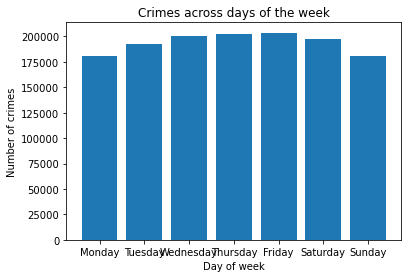

In [14]:
monday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Monday', 'NUMBER_OF_CRIMES'].sum()
tuesday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Tuesday', 'NUMBER_OF_CRIMES'].sum()
wednesday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Wednesday', 'NUMBER_OF_CRIMES'].sum()
thursday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Thursday', 'NUMBER_OF_CRIMES'].sum()
friday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Friday', 'NUMBER_OF_CRIMES'].sum()
saturday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Saturday', 'NUMBER_OF_CRIMES'].sum()
sunday_crimes = date_crime_count_df.loc[date_crime_count_df['DOW'] == 'Sunday', 'NUMBER_OF_CRIMES'].sum()


x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
DOW = [monday_crimes, tuesday_crimes, wednesday_crimes, thursday_crimes, friday_crimes, saturday_crimes, sunday_crimes]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, DOW)
plt.xlabel("Day of week")
plt.ylabel("Number of crimes")
plt.title("Crimes across days of the week")

plt.xticks(x_pos, x)

plt.show()


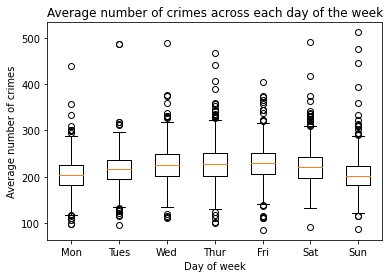

In [15]:
DOW=[]
DOWList=['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
for x in DOWList:
    DOW.append(date_crime_count_df.loc[date_crime_count_df['DOW'] == x, 'NUMBER_OF_CRIMES'])
# print(DOWList)
# averageCrimesOnDOM= plt.boxplot(DOW)
# print(averageCrimesOnDOM)
plt.ylabel("Average number of crimes")
plt.xlabel("Day of week")
plt.title("Average number of crimes across each day of the week")

averageCrimesOnDOM =plt.boxplot(DOW, labels=['Mon', 'Tues','Wed', 'Thur','Fri','Sat', 'Sun'])

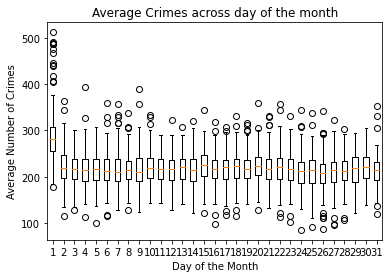

In [16]:
DOM=[]
for x in range(1,32):
    DOM.append(date_crime_count_df.loc[date_crime_count_df['Day'] == x, 'NUMBER_OF_CRIMES'])

plt.ylabel("Average Number of Crimes")
plt.xlabel("Day of the Month")
plt.title("Average Crimes across day of the month")


averageCrimesOnDOM= plt.boxplot(DOM)


#Will we still get the same unequal distribution when we limit large differences in report vs occurrence dates



[71006, 77367, 83882, 90809, 85892, 78027, 83033, 85979, 81230, 76953, 77367, 79564, 83708, 81540, 72753, 68508]
90809


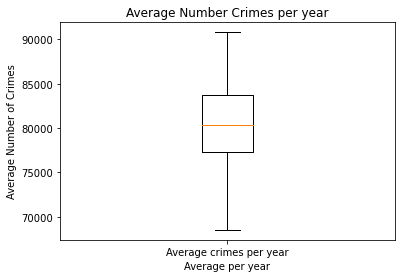

In [20]:
Year=[]
yearList=[2004,2005,2006,2007,2008,2009,2010,2011,2012, 2013,2014,2015,2016,2017,2019,2020]
# yearList=[2016,2017,2018,2019,2020]
for x in yearList:
    Year.append(date_crime_count_df.loc[date_crime_count_df['Year'] == x, 'NUMBER_OF_CRIMES'].sum())

print(Year)
print(max(Year))

plt.ylabel("Average Number of Crimes")
plt.xlabel("Average per year")
plt.title("Average Number Crimes per year")

averageCrimesOnYear= plt.boxplot(Year,labels=['Average crimes per year'])



# plt.xlim(len(yearList))
# CrimesPerYear = plt.bar(x=len(yearList),height=max(yearList))

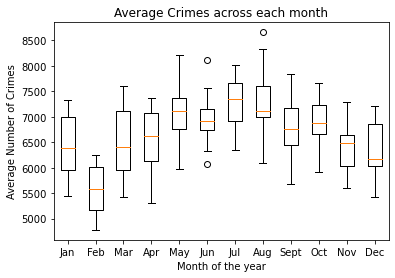

In [21]:

MOY=[]
for month in range(1,13):
    monthgroup=[]
    for year in yearList:
        monthgroup.append(date_crime_count_df.loc[(date_crime_count_df['Month'] == month) & (date_crime_count_df['Year'] == year), 'NUMBER_OF_CRIMES'].sum())

    MOY.append(monthgroup)
# z=0
# for x in MOY:
#     for y in x:
#         z+=y
# print(z)
plt.ylabel("Average Number of Crimes")
plt.xlabel("Month of the year")
plt.title("Average Crimes across each month")
averageCrimesOnMOY= plt.boxplot(MOY,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sept','Oct','Nov','Dec'])



####
#### .00-.19 “very weak”
#### .20-.39 “weak”
#### .40-.59 “moderate”
#### .60-.79 “strong”
#### .80-1.0 “very strong”


In [19]:
#What is the correlation between precipitation and number of crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='PRCP', y='NUMBER_OF_CRIMES', kind='scatter', title="Correlation betwen precipitation and crimes" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMIN', y='NUMBER_OF_CRIMES', kind='scatter', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMAX', y='NUMBER_OF_CRIMES', kind='scatter', )

ValueError: array must not contain infs or NaNs

(-0.11023069713091635, 2.3260729710118275e-06)


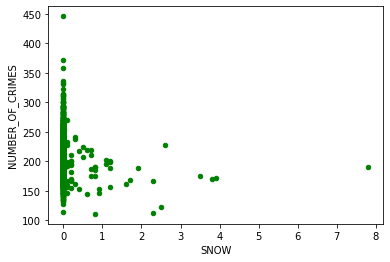

In [203]:
#What is the correlation between snow amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['SNOW'],date_crime_count_df['NUMBER_OF_CRIMES']))
#Scatter plot for snow and number of crimes
date_crime_count_df.plot(x='SNOW', y='NUMBER_OF_CRIMES', kind='scatter', color='green', )

In [22]:
#What is the correlation between weather and number of assaults per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='PRCP', y='ASSAULT', kind='scatter', color='aqua', title="Correlation betwen Precipitation and assault" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='TMIN', y='ASSAULT', kind='scatter', color='aqua', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ASSAULT']))
date_crime_count_df.plot(x='TMAX', y='ASSAULT', kind='scatter', color='aqua', )

ValueError: array must not contain infs or NaNs

(-0.008821213466366877, 0.7063236407274548)
(0.09978653831939048, 1.928887747611168e-05)
(0.09438425804971169, 5.332199003766588e-05)


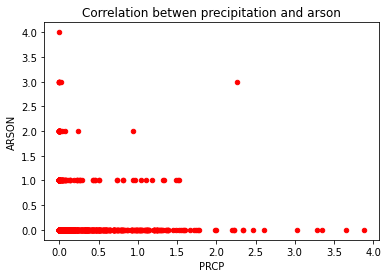

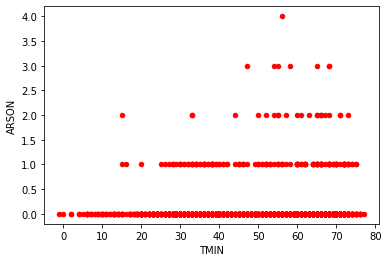

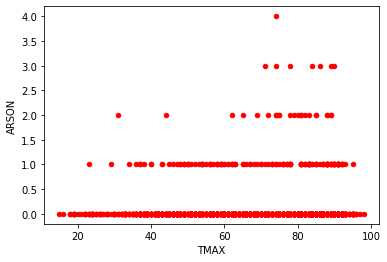

In [205]:
#What is the correlation between weather and arsons per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='PRCP', y='ARSON', kind='scatter', color='red', title="Correlation betwen precipitation and arson" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='TMIN', y='ARSON', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ARSON']))
date_crime_count_df.plot(x='TMAX', y='ARSON', kind='scatter', color='red', )

(-0.0027760359597612085, 0.9056110488659899)
(0.03640544416304195, 0.1198165973417587)
(0.036876190418110355, 0.11510149050532652)


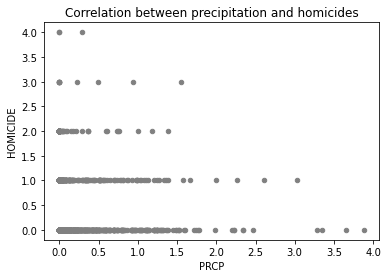

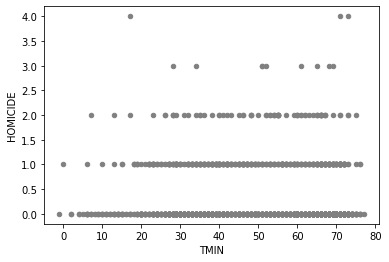

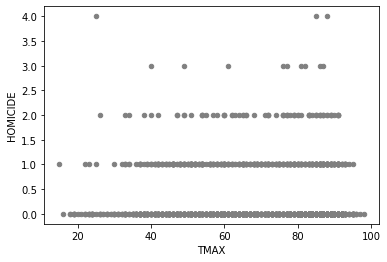

In [206]:
#What is the correlation between weather and Homicides per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='PRCP', y='HOMICIDE', kind='scatter', color='grey', title="Correlation between precipitation and homicides")

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='TMIN', y='HOMICIDE', kind='scatter', color='grey', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['HOMICIDE']))
date_crime_count_df.plot(x='TMAX', y='HOMICIDE', kind='scatter', color='grey', )

(-0.05342011616655603, 0.022405272028209793)
(0.22855657186823714, 4.426943735956588e-23)
(0.2316737655302371, 1.0965102782367973e-23)


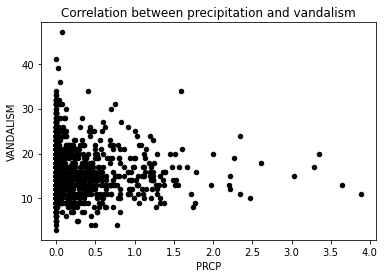

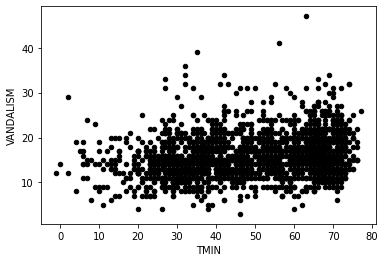

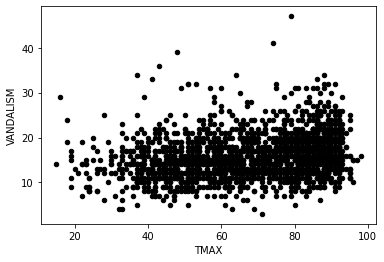

In [207]:
#What is the correlation between weather and vandalisms per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='PRCP', y='VANDALISM', kind='scatter', color='black', title="Correlation between precipitation and vandalism")

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='TMIN', y='VANDALISM', kind='scatter', color='black', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['VANDALISM']))
date_crime_count_df.plot(x='TMAX', y='VANDALISM', kind='scatter', color='black', )

In [128]:
#What is the correlation between Precipitation and robbery per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='PRCP', y='ROBBERY', kind='scatter', color='aqua', title="Correlation between precipitation and robbery")

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='TMIN', y='ROBBERY', kind='scatter', color='aqua', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['ROBBERY']))
date_crime_count_df.plot(x='TMAX', y='ROBBERY', kind='scatter', color='aqua', )

KeyError: 'ROBBERY'

(-0.024073697907888488, 0.3037443150471391)
(0.1874698581929116, 6.511242222574186e-16)
(0.1769730746907035, 2.5471148375964648e-14)


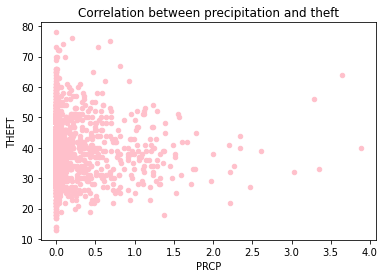

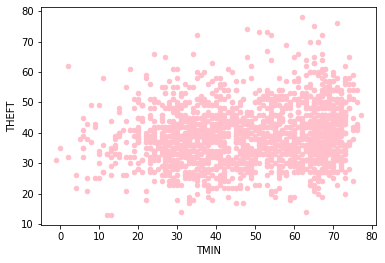

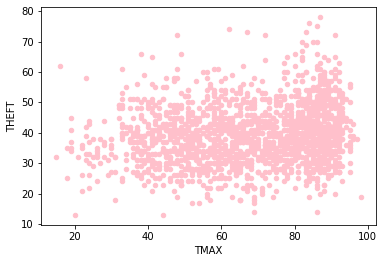

In [209]:
#What is the correlation between Precipitation and Theft per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='PRCP', y='THEFT', kind='scatter', color='pink', title="Correlation between precipitation and theft" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='TMIN', y='THEFT', kind='scatter', color='pink', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['THEFT']))
date_crime_count_df.plot(x='TMAX', y='THEFT', kind='scatter', color='pink', )

(-0.08252024719570344, 0.000414294363815886)
(-0.08234523639865635, 0.00042621997848226996)
(-0.07025579967674589, 0.0026590312976263577)


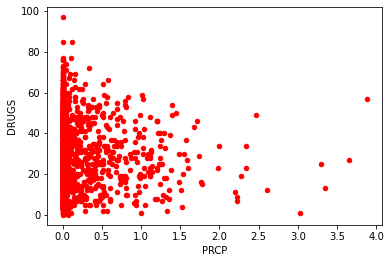

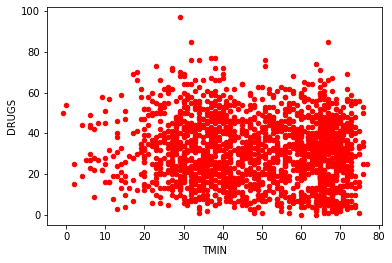

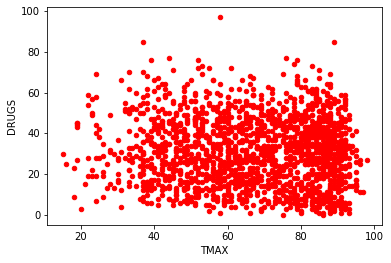

In [210]:
#What is the correlation between weather and drugs per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='PRCP', y='DRUGS', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='TMIN', y='DRUGS', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['DRUGS']))
date_crime_count_df.plot(x='TMAX', y='DRUGS', kind='scatter', color='red', )

(0.001587355296707357, 0.9459427723889329)
(0.028398038096092607, 0.22503684550768877)
(0.022749433510574957, 0.3311257393169047)


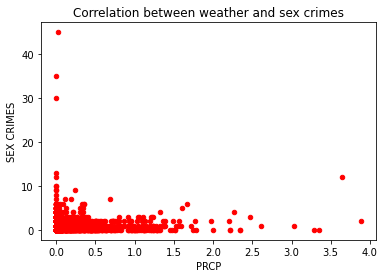

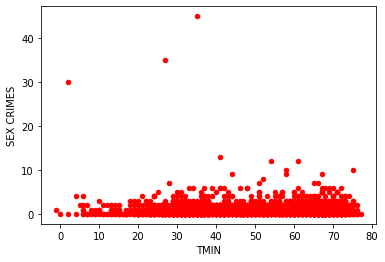

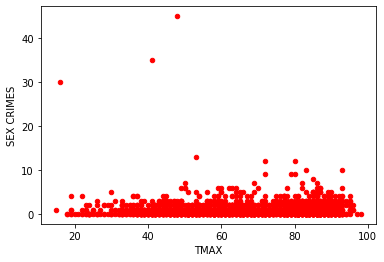

In [211]:
#What is the correlation between weather and sex crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='PRCP', y='SEX CRIMES', kind='scatter', color='red', title="Correlation between precipitation and sex crimes" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='TMIN', y='SEX CRIMES', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['SEX CRIMES']))
date_crime_count_df.plot(x='TMAX', y='SEX CRIMES', kind='scatter', color='red', )

(-0.04072092097359657, 0.08184462886126223)
(0.2213370239677705, 1.0364617435102488e-21)
(0.216085015655362, 9.592325855295789e-21)


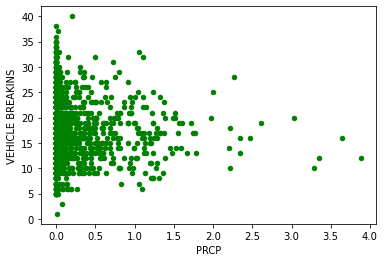

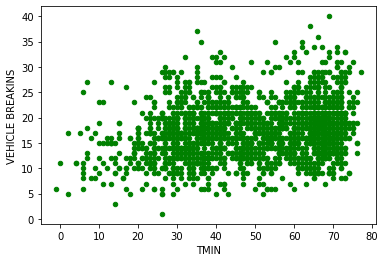

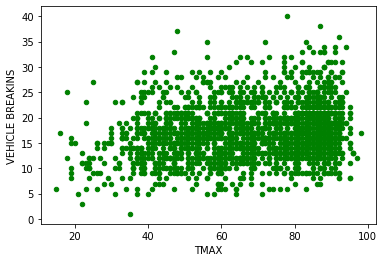

In [212]:
#What is the correlation between weather and vehicle break-ins per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='PRCP', y='VEHICLE BREAKINS', kind='scatter', color='green', title="Correlation between precipitation and behicle break ins" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='TMIN', y='VEHICLE BREAKINS', kind='scatter', color='green', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['VEHICLE BREAKINS']))
date_crime_count_df.plot(x='TMAX', y='VEHICLE BREAKINS', kind='scatter', color='green', )


(-0.018260646248247754, 0.435359484433645)
(0.21981120088981554, 1.9901522553674405e-21)
(0.2174221933037508, 5.473396304183703e-21)


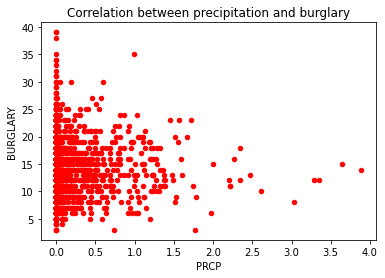

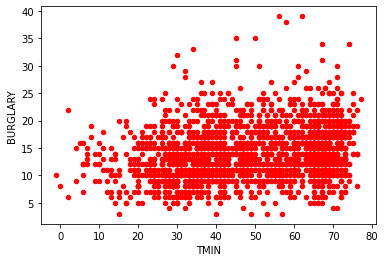

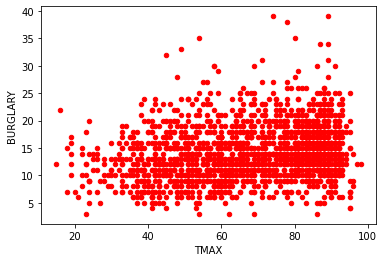

In [213]:
#What is the correlation between weather and burglary per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='PRCP', y='BURGLARY', kind='scatter', color='red', title="Correlation between precipitation and burglary" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='TMIN', y='BURGLARY', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['BURGLARY']))
date_crime_count_df.plot(x='TMAX', y='BURGLARY', kind='scatter', color='red', )

(-0.014457275888109064, 0.5368635918543643)
(-0.01316645936917902, 0.5738307660795595)
(-0.005838779153358505, 0.8030508329313341)


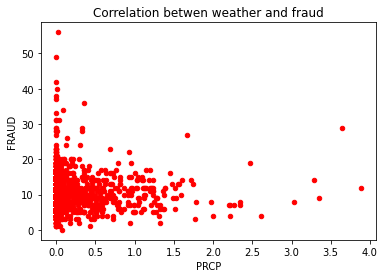

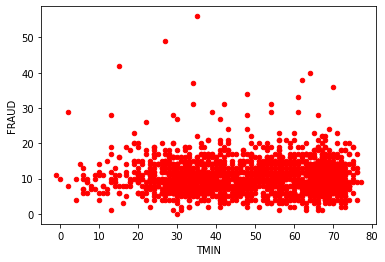

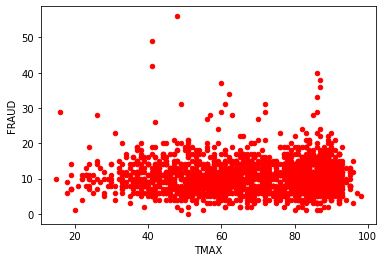

In [214]:
#What is the correlation between weather and fraud per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='PRCP', y='FRAUD', kind='scatter', color='red', title="Correlation betwen precipitation and fraud" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='TMIN', y='FRAUD', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['FRAUD']))
date_crime_count_df.plot(x='TMAX', y='FRAUD', kind='scatter', color='red', )

(-0.0039139189782265394, 0.8672280827613281)
(0.13425890752404096, 8.368795426502908e-09)
(0.14260098110188382, 9.217916795147957e-10)


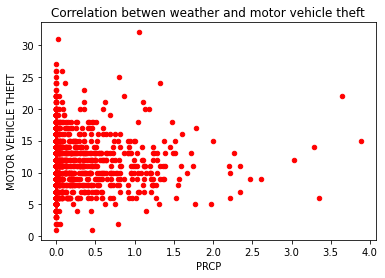

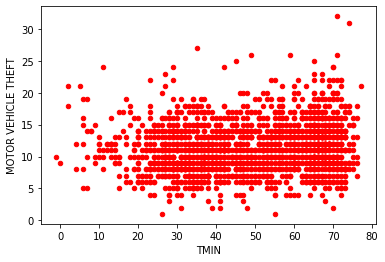

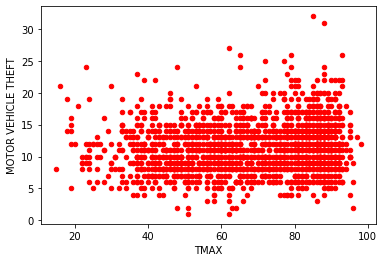

In [215]:
#What is the correlation between weather and motor vehicle theft per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='PRCP', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', title="Correlation betwen weather and motor vehicle theft" )

print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='TMIN', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', )

print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['MOTOR VEHICLE THEFT']))
date_crime_count_df.plot(x='TMAX', y='MOTOR VEHICLE THEFT', kind='scatter', color='red', )

In [216]:
# date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
# date_crime_count_df['ASSAULT'] = assault_series
# date_crime_count_df['THEFT'] = theft_series
# date_crime_count_df['OTHER'] = other_series
# date_crime_count_df['DRUGS'] = drugs_series
# date_crime_count_df['VEHICLE BREAKINS'] = vehicle_break_series
# date_crime_count_df['VANDALISM'] = vandalism_series
# date_crime_count_df['BURGLARY'] = burglary_series
# date_crime_count_df['MOTOR VEHICLE THEFT'] = motor_vehicle_theft_series
# date_crime_count_df['FRAUD'] = fraud_series
# date_crime_count_df['ROBBERY'] = robbery_series
# date_crime_count_df['WEAPONS'] = weapons_series
# date_crime_count_df['SEX CRIMES'] = sex_crimes_series
# date_crime_count_df['DISTURBING PEACE'] = disturbing_peace_series
# date_crime_count_df['HOMICIDE'] = homicide_series
# date_crime_count_df['ARSON'] = arson_series
# date_crime_count_df['DUI'] = dui_series
